In [88]:
from cartopy.feature import ShapelyFeature,NaturalEarthFeature
import numpy as np
from awips.dataaccess import DataAccessLayer
from matplotlib import patheffects
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [89]:
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")

In [90]:
dataTypes = DataAccessLayer.getSupportedDatatypes()
#list(dataTypes)

In [91]:
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")

In [92]:
available_grids = DataAccessLayer.getAvailableLocationNames(request)
available_grids.sort()
list(available_grids)

['AUTOSPE',
 'CMC',
 'ESTOFS',
 'ETSS',
 'FFG-ALR',
 'FFG-FWR',
 'FFG-KRF',
 'FFG-MSR',
 'FFG-ORN',
 'FFG-PTR',
 'FFG-RHA',
 'FFG-RSA',
 'FFG-STR',
 'FFG-TAR',
 'FFG-TIR',
 'FFG-TUA',
 'GEFS',
 'GFS',
 'GFS20',
 'HFR-EAST_6KM',
 'HFR-EAST_PR_6KM',
 'HFR-US_EAST_DELAWARE_1KM',
 'HFR-US_EAST_FLORIDA_2KM',
 'HFR-US_EAST_NORTH_2KM',
 'HFR-US_EAST_SOUTH_2KM',
 'HFR-US_EAST_VIRGINIA_1KM',
 'HFR-US_HAWAII_1KM',
 'HFR-US_HAWAII_2KM',
 'HFR-US_HAWAII_6KM',
 'HFR-US_WEST_500M',
 'HFR-US_WEST_CENCAL_2KM',
 'HFR-US_WEST_LOSANGELES_1KM',
 'HFR-US_WEST_LOSOSOS_1KM',
 'HFR-US_WEST_NORTH_2KM',
 'HFR-US_WEST_SANFRAN_1KM',
 'HFR-US_WEST_SOCAL_2KM',
 'HFR-US_WEST_WASHINGTON_1KM',
 'HFR-WEST_6KM',
 'HPCGuide',
 'HPCqpfNDFD',
 'HRRR',
 'LAMP2p5',
 'MOSGuide',
 'NAM12',
 'NAM40',
 'NOHRSC-SNOW',
 'NationalBlend',
 'PROB3HR',
 'RAP13',
 'RTMA',
 'RTOFS-Now-WestAtl',
 'RTOFS-Now-WestConus',
 'RTOFS-WestAtl',
 'RTOFS-WestConus',
 'SPCGuide',
 'SeaIce',
 'TPCWindProb',
 'URMA25',
 'WRF-alt',
 'WRF-primary',
 'W

In [95]:
request.setLocationNames("RAP13")

In [96]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
list(availableParms)

['36SHRMi',
 '50dbzZ',
 'AV',
 'Along',
 'AppT',
 'BLI',
 'BRN',
 'BRNEHIi',
 'BRNSHR',
 'BRNmag',
 'BRNvec',
 'BdEPT06',
 'BlkMag',
 'BlkShr',
 'CAPE',
 'CFRZR',
 'CICEP',
 'CIn',
 'CP',
 'CP1hr',
 'CPr',
 'CPrD',
 'CRAIN',
 'CSNOW',
 'CURU',
 'CXR',
 'CapeStk',
 'Corf',
 'CorfF',
 'CorfFM',
 'CorfM',
 'CritT1',
 'CumNrm',
 'CumShr',
 'DivF',
 'DivFn',
 'DivFs',
 'DpD',
 'DpT',
 'EHI',
 'EHI01',
 'EHIi',
 'EPT',
 'EPTA',
 'EPTC',
 'EPTGrd',
 'EPTGrdM',
 'EPTs',
 'EPVg',
 'EPVs',
 'EPVt1',
 'EPVt2',
 'ESP',
 'ESP2',
 'FVecs',
 'FeatMot',
 'FnVecs',
 'FsVecs',
 'Fzra1',
 'Fzra2',
 'GH',
 'GHxSM',
 'GHxSM2',
 'Gust',
 'HI',
 'HI1',
 'HI3',
 'HI4',
 'HIdx',
 'HPBL',
 'Heli',
 'HeliC',
 'INV',
 'IPLayer',
 'Into',
 'KI',
 'L-I',
 'LIsfc2x',
 'LM5',
 'LM6',
 'MAdv',
 'MCon',
 'MCon2',
 'MLLCL',
 'MMP',
 'MMSP',
 'MSFDi',
 'MSFi',
 'MSFmi',
 'MSG',
 'MTV',
 'Mix1',
 'Mix2',
 'Mmag',
 'MpV',
 'NBE',
 'NST',
 'NST1',
 'NST2',
 'OmDiff',
 'P',
 'PAdv',
 'PBE',
 'PEC',
 'PFrnt',
 'PGrd',
 'PGrd1

In [8]:
availableLevels = DataAccessLayer.getAvailableLevels(request)
for level in availableLevels:
    print(level)

0.0SFC
200.0MB
0.0FRZ
350.0MB
300.0MB
400.0MB
450.0MB
500.0MB
550.0MB
600.0MB
100.0MB
150.0MB
250.0MB
125.0MB
2000.0FHAG
1000.0MB
900.0MB
825.0MB
225.0MB
500.0FHAG
725.0MB
800.0MB
750.0MB
675.0MB
375.0MB
2500.0FHAG
0.0_1000.0FHAG
575.0MB
650.0MB
475.0MB
925.0MB
875.0MB
950.0MB
0.0FHAG
175.0MB
1500.0FHAG
850.0MB
775.0MB
3000.0FHAG
275.0MB
1000.0FHAG
325.0MB
700.0MB
625.0MB
975.0MB
425.0MB
525.0MB
340.0_350.0K
261.149_255.149TEMP
290.0_300.0K
320.0Ke
8839.0FH
264.15TEMP
0.0_610.0FHAG
6000.0FH
9144.0FH
5500.0FH
400.0_1000.0BL
12496.0FH
340.0K
5500.0_6000.0FHAG
255.0K
255.0_265.0K
3000.0_6000.0FHAG
5486.0FH
0.0_500.0FHAG
19812.0FH
280.0_290.0Ke
1524.0FHAG
5000.0FH
320.0_330.0K
5181.6FH
5181.0FH
150.0_180.0BL
310.0_320.0Ke
310.0Ke
330.0K
12192.0FH
3500.0FHAG
300.0_310.0K
4000.0FH
3000.0_12000.0FHAG
8534.0FH
320.0K
11887.0FH
1250.0FH
304.8FH
304.0FH
345.0K
250.0_260.0K
300.0Ke
8229.0FH
2250.0FH
3000.0FH
290.0Ke
0.0TROP
4572.0FHAG
16764.0FH
275.0_285.0Ke
335.0Ke
295.0_305.0Ke
275.0_285.0K
310

In [31]:
def make_map(bbox, projection=ccrs.LambertConformal()):
    fig, ax = plt.subplots(figsize=(16, 9),
            subplot_kw=dict(projection=projection))
    ax.set_extent(bbox)
    ax.coastlines(resolution='50m')
    #gl = ax.gridlines(draw_labels=True)
    #gl.xlabels_top = gl.ylabels_right = False
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [71]:
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")
request.setLocationNames("RAP13")
request.setParameters("vW")
request.setLevels("0.0SFC")
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
#print(np.unique(times))
fcstRun = DataAccessLayer.getForecastRun(cycles[-1], times)
response = DataAccessLayer.getGridData(request, [fcstRun[3]])
grid = response[0]
dataV = grid.getRawData()

request.setParameters("uW")
#request.setParameters("wSp")
#request.setLevels("10.0FHAG")
request.setLevels("0.0SFC")
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
#print(np.unique(times))
fcstRun = DataAccessLayer.getForecastRun(cycles[-1], times)
response = DataAccessLayer.getGridData(request, [fcstRun[3]])
grid = response[0]
dataU = grid.getRawData()


DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")
request.setLocationNames("RAP13")
request.setParameters("PW")
#request.setParameters("wSp")
#request.setLevels("10.0FHAG")
#request.setLevels("0.0SFC")
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
fcstRun = DataAccessLayer.getForecastRun(cycles[-1], times)
response = DataAccessLayer.getGridData(request, [fcstRun[3]])
grid = response[0]
data = grid.getRawData()




DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("grid")
request.setLocationNames("RAP13")
request.setParameters('msl-P')
#request.setParameters("wSp")
#request.setLevels("10.0FHAG")
#request.setLevels("0.0SFC")
cycles = DataAccessLayer.getAvailableTimes(request, True)
times = DataAccessLayer.getAvailableTimes(request)
fcstRun = DataAccessLayer.getForecastRun(cycles[-1], times)
response = DataAccessLayer.getGridData(request, [fcstRun[3]])
grid = response[0]
dataMSLP = grid.getRawData()



lons, lats = grid.getLatLonCoords()
bbox = [lons.min(), lons.max(), lats.min(), lats.max()]
bbox = [-124,-70,20,52]

In [109]:
grid.getAttributes()
grid.getParameter()

AttributeError: 'dict_keys' object has no attribute 'info'

In [52]:
list(grid.getAttributes())

['info.ensembleId',
 'info.datasetId',
 'info.secondaryId',
 'info.level.leveltwovalue',
 'info.level.levelonevalue',
 'info.level.masterLevel.name']

In [13]:
fcstRun[0].fcstTime

0

In [14]:
DataAccessLayer.getAvailableTimes?

In [59]:
fcstRun.sort()
len(fcstRun)

22

In [60]:
grid.getDataTime().getRefTime()

2019-08-06 17:00:00.000

/Users/chowdahead/miniconda3/envs/py-awips/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


Denver


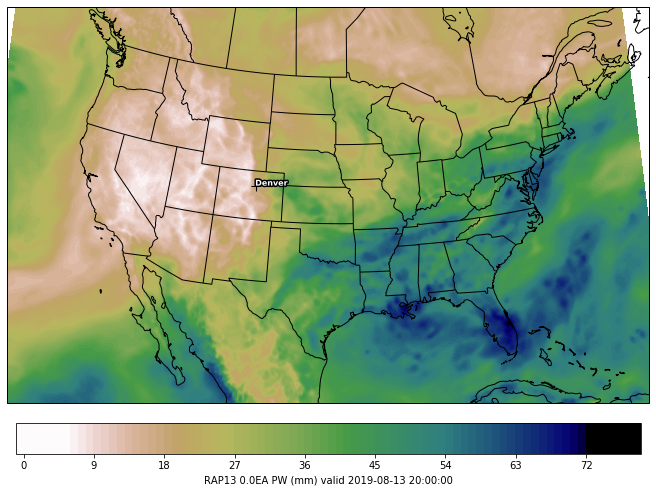

In [46]:
cmap = plt.get_cmap('gist_earth_r')
fig2, ax2 = make_map(bbox=bbox)
levels = np.arange(-1,80,1)
cs2 = ax2.contourf(lons, lats, data, levels, cmap=cmap,
                  vmin=data.min(), vmax=data.max(),transform=ccrs.PlateCarree())
#plt.title(str(grid.getLocationName()) +" " \
#              + str(grid.getLevel()) + " " \
#               + str(grid.getParameter()) \
#               + " (" + str(grid.getUnit()) + ") " \
#               + "valid " + str(grid.getDataTime().getRefTime()))
cbar2 = fig2.colorbar(cs2, shrink=0.7, orientation='horizontal',pad=0.04)
cbar2.set_label(str(grid.getLocationName()) +" " \
               + str(grid.getLevel()) + " " \
               + str(grid.getParameter()) \
               + " (" + str(grid.getUnit()) + ") " \
               + "valid " + str(grid.getDataTime()))#.getRefTime()))

from geopy.geocoders import Nominatim
import math

#cities = ["Colorado Springs",
#          "Boulder",
#          "Fort Collins",
#         "Denver"] #"Pueblo"

states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax2.add_feature(states, linestyle='-', edgecolor='black',linewidth=1)


political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
#ax2.add_feature(cfeature.LAND)
#ax2.add_feature(cfeature.COASTLINE)

ax2.add_feature(political_boundaries, edgecolor='black')


cities = ["Denver Colorado"]

geolocator = Nominatim()
for city in cities:
    print(city)
    loc = geolocator.geocode(city)
    geolocator = Nominatim(user_agent='myapplication')
    #x, y = plt(loc.longitude, loc.latitude)
    ax2.plot(loc.longitude, loc.latitude,marker='+',color='k',markersize=10,transform=ccrs.PlateCarree())
    #ax2.text(loc.longitude-0.05, loc.latitude+0.05,city,color='k',transform=ccrs.PlateCarree())#linewidth=4,
    text_time2 = ax2.text(loc.longitude-0.05, loc.latitude+0.05, 
            city,
            horizontalalignment='left', transform=ccrs.PlateCarree(),
            color='white', fontsize=8, weight='bold',zorder=15)

    outline_effect = [patheffects.withStroke(linewidth=3, foreground='black')]
    text_time2.set_path_effects(outline_effect)


In [47]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
location = geolocator.geocode("Chicago Illinois")
print(location.address)

Chicago, Cook County, Illinois, United States of America


In [82]:
dataMSLP = dataMSLP.astype(int)

/Users/chowdahead/miniconda3/envs/py-awips/lib/python3.7/site-packages/ipykernel_launcher.py:47: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


Denver


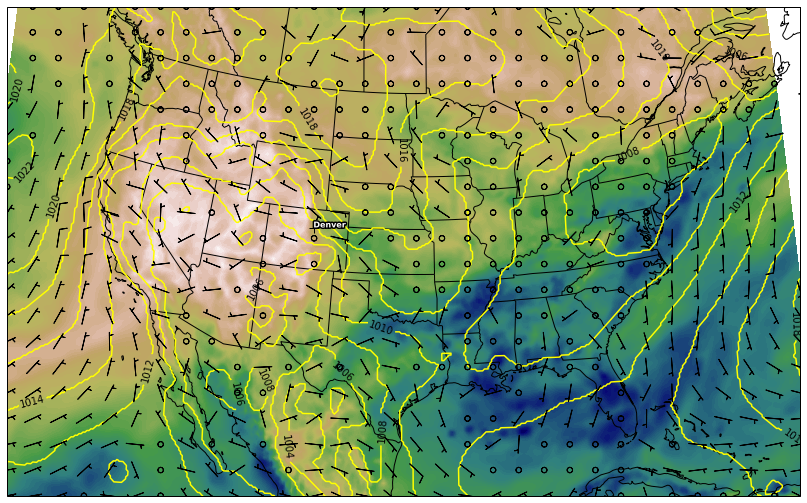

In [87]:
fig2, ax2 = make_map(bbox=bbox)
levels = np.arange(-1,80,1)
ax2.barbs(lons, lats, dataU, dataV,zorder=30,
         length=6, regrid_shape=20, pivot='middle', transform=ccrs.PlateCarree(),barbcolor='k')


cmap = plt.get_cmap('gist_earth_r')
levels = np.arange(-1,80,1)
cs3 = ax2.contourf(lons, lats, data, levels, cmap=cmap,
                  vmin=data.min(), vmax=data.max(),transform=ccrs.PlateCarree())

levels2 = np.arange(990,1040,2)
cs2 = ax2.contour(lons, lats, dataMSLP, levels2,colors="yellow",
                  vmin=dataMSLP.min(), vmax=dataMSLP.max(),transform=ccrs.PlateCarree())
plt.clabel(cs2, fontsize=10, inline=1,colors='k',fmt='%d')
#plt.title(str(grid.getLocationName()) +" " \
#              + str(grid.getLevel()) + " " \
#               + str(grid.getParameter()) \
#               + " (" + str(grid.getUnit()) + ") " \
#               + "valid " + str(grid.getDataTime().getRefTime()))

from geopy.geocoders import Nominatim
import math

#cities = ["Colorado Springs",
#          "Boulder",
#          "Fort Collins",
#         "Denver"] #"Pueblo"

states = NaturalEarthFeature(category='cultural',
                               name='admin_1_states_provinces_lines',
                               scale='50m', facecolor='none')
ax2.add_feature(states, linestyle='-', edgecolor='black',linewidth=1)


political_boundaries = NaturalEarthFeature(category='cultural',
                               name='admin_0_boundary_lines_land',
                               scale='50m', facecolor='none')
#ax2.add_feature(cfeature.LAND)
#ax2.add_feature(cfeature.COASTLINE)

ax2.add_feature(political_boundaries, edgecolor='black')


cities = ["Denver"]

geolocator = Nominatim()
for city in cities:
    print(city)
    loc = geolocator.geocode(city)
    geolocator = Nominatim(user_agent='myapplication')
    #x, y = plt(loc.longitude, loc.latitude)
    ax2.plot(loc.longitude, loc.latitude,marker='+',color='k',markersize=10,transform=ccrs.PlateCarree())
    #ax2.text(loc.longitude-0.05, loc.latitude+0.05,city,color='k',transform=ccrs.PlateCarree())#linewidth=4,
    text_time2 = ax2.text(loc.longitude-0.05, loc.latitude+0.05, 
            city,
            horizontalalignment='left', transform=ccrs.PlateCarree(),
            color='white', fontsize=8, weight='bold',zorder=15)

    outline_effect = [patheffects.withStroke(linewidth=3, foreground='black')]
    text_time2.set_path_effects(outline_effect)
